### 학습목표
- 당뇨병 데이터를 활용하여 당뇨 진행도를 파악할 수 있다.
- 데이터 불러오기 -> 제공데이터(sklearn)
  - 입력특성: 442명 대상 당뇨병 환자를 검사한 결과
  - 정답데이터: 1년뒤 측정한 당뇨병 진행률

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()
data
# 번치객체

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
# 데이터 프레임에 담기
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_data['target'] = data.target
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


- 입력특성데이터 확인
  - age: 나이
  - sex: 성별
  - bmi: BMI 지수
  - bp: 평균 혈압
  - s1~s6: 6가지 종류의 혈액 검사 결과 수치
- 정답데이터
  - target: 당뇨 진행률

In [4]:
df_data['target']
# 연속형 데이터 -> 회귀

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


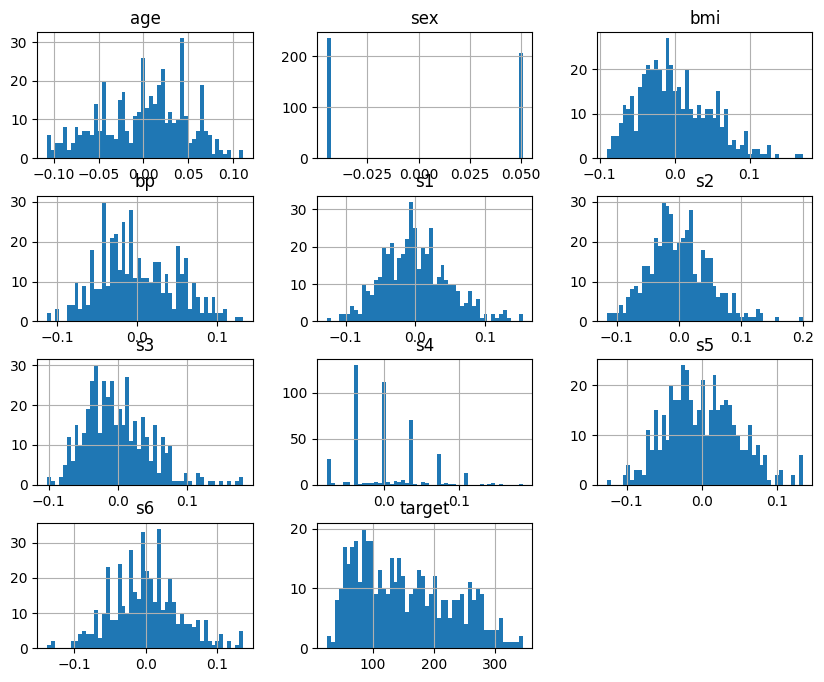

In [5]:
import matplotlib.pyplot as plt
df_data.hist(bins = 50, figsize = (10,8))
plt.show()

- 문제와 정답으로 분리

In [6]:
df_data['target'].dtype

dtype('float64')

In [7]:
df_data.values

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [8]:
# numpy -> tensor 변환
import torch
data = torch.from_numpy(df_data.values).float()

In [9]:
# 문제, 정답 분리
data.shape
# 10개 -> 입력
# 1개 - 정답
X = data[:, : -1]
y = data[:, -1]

In [10]:
X.shape, y.shape

(torch.Size([442, 10]), torch.Size([442]))

In [11]:
# PyTorch의 브로드캐스팅 규칙 + 연산 일치 조건 때문에 차원 확장 필요!
# 정답데이터 2차원으로 변경
y = y.unsqueeze(1)

In [12]:
y.size()

torch.Size([442, 1])

- 모델 구조 설계 (선형회귀모델)

In [13]:
import torch.nn as nn

# 선형회귀모델 생성
# nn.Linear(in_features= 10, out_features=1)
model = nn.Linear(in_features= X.size(-1), out_features=y.size(-1)) # 마지막 차원의 수


In [14]:
import torch.optim as optim
# 최적화함수 생성
# 모델의 파라미터 값들을 넣어줘야한다 (w,b)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

- 모델 학습

In [15]:
import torch.nn.functional as F
from tqdm import tqdm #반복문 진행시 진행상황을 시각적으로 보여주는 로딩바

epochs = 200000 # 학습횟수
print_interval = 20000 # 학습결과 출력을 위한 분리

for i in tqdm(range(epochs)):
  # 모델 적용
  y_pre = model(X)
  # 오차 계산
  loss = F.mse_loss(y_pre, y)

  # 최적화함수 초기화
  optimizer.zero_grad() # 이전에 반복계산된 결과 초기화
  # 오차 역전파
  loss.backward()

  # 역전파 단계에서 계산된 기울기로 가중치 업데이트 (w,b)
  optimizer.step()

  if (i+1) % print_interval == 0: # 20만번의 학습중, 2만번마다 출력
    print(f"epoch:{i+1}, loss = {loss:.4e}")

 10%|█         | 20415/200000 [00:13<01:17, 2321.84it/s]

epoch:20000, loss = 5.7878e+03


 20%|██        | 40431/200000 [00:23<01:09, 2299.15it/s]

epoch:40000, loss = 5.6377e+03


 30%|███       | 60336/200000 [00:32<01:00, 2315.27it/s]

epoch:60000, loss = 5.5044e+03


 40%|████      | 80329/200000 [00:42<01:07, 1769.55it/s]

epoch:80000, loss = 5.3792e+03


 50%|█████     | 100253/200000 [00:51<00:42, 2343.60it/s]

epoch:100000, loss = 5.2618e+03


 60%|██████    | 120353/200000 [01:01<00:34, 2302.10it/s]

epoch:120000, loss = 5.1515e+03


 70%|███████   | 140293/200000 [01:11<00:25, 2310.40it/s]

epoch:140000, loss = 5.0479e+03


 80%|████████  | 160340/200000 [01:20<00:22, 1724.47it/s]

epoch:160000, loss = 4.9506e+03


 90%|█████████ | 180354/200000 [01:29<00:08, 2361.48it/s]

epoch:180000, loss = 4.8591e+03


100%|██████████| 200000/200000 [01:39<00:00, 2007.66it/s]

epoch:200000, loss = 4.7730e+03


- 결과 확인

In [16]:
import matplotlib.pyplot as plt

In [18]:
# 결과를 시각화 할때 텐서연산의 결과를 초기화 후 넘파이 배열로 변경하여 시각화하는것이 안전
# 예측값 (y_pre)결과의 텐서를 해제 하고 넘파이로 변환
np_pre = y_pre.detach().numpy()

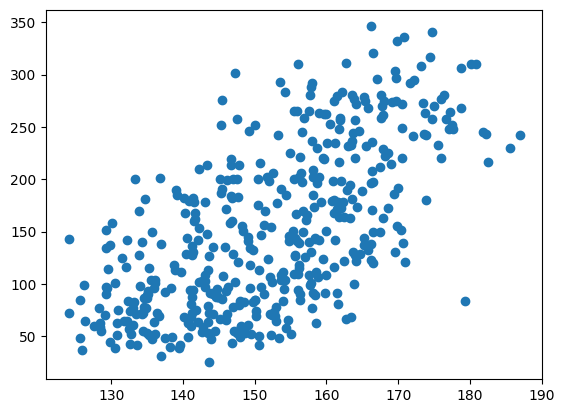

In [19]:
# 시각화 -> 산점도 그래프
plt.scatter(x = np_pre, y = y)